## Principal Component Analysis
transforming high-dimensional data into a lower-dimensional space while maximizing the variance of the data in the new space
- reduces the number of dimensions in large datasets 
- transforming potentially correlated variables into a smaller set of variables
- reduces model complexity
- minimizes overfitting
- reduces **munticollinearity**
    - two or more independent variables are highly correlated with one another

2 principal components
- retain most of the original information
- linear combinations of the original variables with maximum variance

PC1
- direction in space along which the data points have the highest or most variance
- best represents the shape of the projected points

PC2
- next highest variance in the dataset 
- uncorrelated to PC1 
- orthogolnal/perpedicular to PC1

### Steps
1. standardize data
2. compute covariance matrix to find correlations
3. calculate eigen vectors and eigen values of covariance matrix to identify PCs
4. select principal components
    - components with low eigenvalues typically will not be as significant
5. transform data into the new coordinate system defined by the principal components
    - feature vector created from the eigenvectors of the covariance matrix projects the data onto the new axes defined by the principal components

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [33]:
data = load_breast_cancer(as_frame=True)
df = data.frame
X = df[data['feature_names']]

In [ ]:
mean = X.mean()
std = X.std()
Z = (X - mean) / std

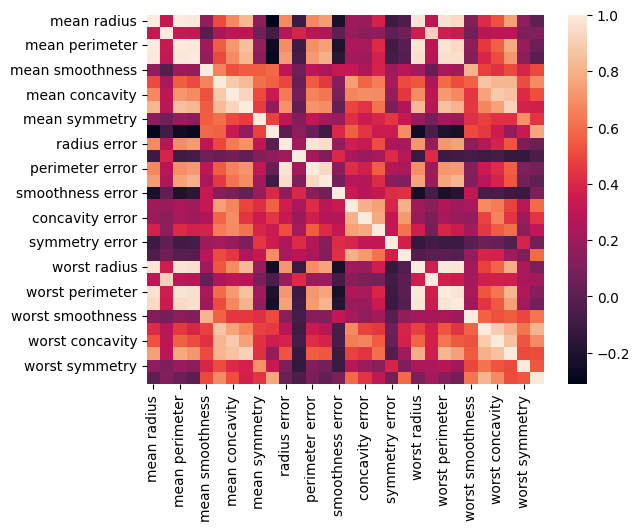

In [ ]:
c = Z.cov()
sns.heatmap(c)
plt.show()

In [36]:
# eigen vectors and values

eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)


idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]


array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [37]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

np.int64(2)

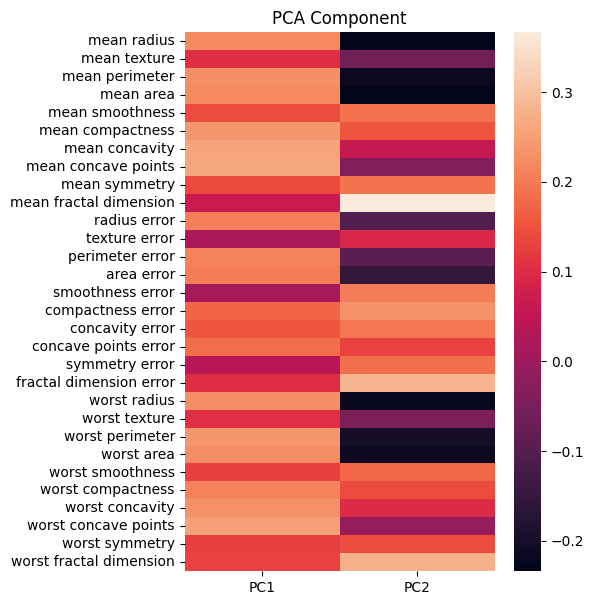

In [38]:
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = data['feature_names'],
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [39]:
Z_pca = Z @ pca_component
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
print(Z_pca)

          PCA1       PCA2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


In [ ]:
pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)

df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca1)

           PC1        PC2
0     9.184755   1.946870
1     2.385703  -3.764859
2     5.728855  -1.074229
3     7.116691  10.266556
4     3.931842  -1.946359
..         ...        ...
564   6.433655  -3.573673
565   3.790048  -3.580897
566   1.255075  -1.900624
567  10.365673   1.670540
568  -5.470430  -0.670047

[569 rows x 2 columns]


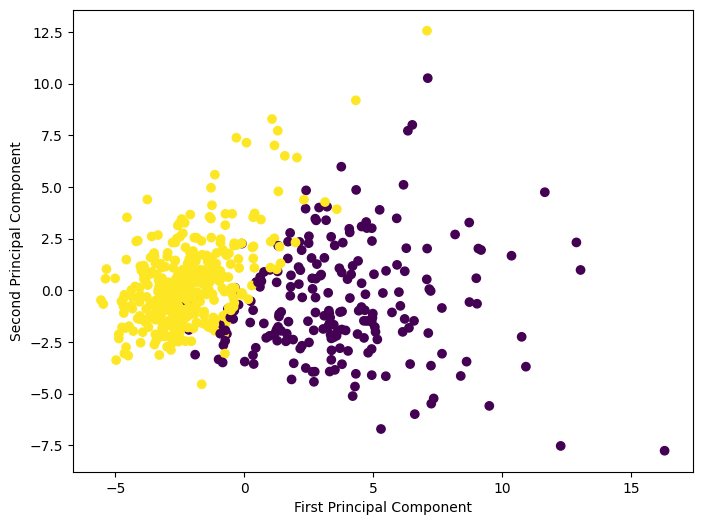

In [41]:
plt.figure(figsize=(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['target'])

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

- for data preprocessing for use with machine learning algorithms
- commonly used approach within regression analysis
      
- image compression
- data visualization
- noise filtering

>class sklearn.decomposition.PCA(  
&emsp; n_components=None, *,   
&emsp; copy=True,   
&emsp; whiten=False,   
&emsp; svd_solver='auto',   
&emsp; tol=0.0,   
&emsp; iterated_power='auto',   
&emsp; n_oversamples=10,   
&emsp; power_iteration_normalizer='auto',   
&emsp; random_state=None  
)

| parameters                  | possible values                                              | desc |
|-----------------------------|--------------------------------------------------------------|------|
| n_components                | None (default) <br> int <br> float                           | keep all components <br> number of components <br> keeps components that explain given variance |
| copy                        | True (default) <br> False                                    | original data unchanged <br> overwrites data |
| whiten                      | False (default) <br> True                                    | keep original variance <br> normalize components to have unit var |
| svd_solver                  | 'auto' (default) <br> 'full' <br> 'arpack' <br> 'randomized' | chooses best option <br> full SVD <br> iterative method <br> approximate decomposition (faster for large data) |

<br>

| for arpack:                 | possible values                                           | desc |
|-----------------------------|-----------------------------------------------------------|------|
| tol                         | float (default: 0.0)                                      | Convergence tolerance, stopping criterion |

<br>

| for randomized:             | possible values                                           | desc |
|-----------------------------|----------------------------------------------------|------|
| iterated_power              | 'auto' (default) <br> int                          | selects best number of iterations for power method <br> fixed number of iterations |
| n_oversamples               | int (default: 10)                                  | extra random samples to improve approximation |
| power_iteration_normalizer  | 'auto' (default) <br> 'none' <br> 'QR' <br> 'LU'   | selects best normalization method <br> no normalization <br> QR decomposition <br> LU decomposition |
| random_state                | None (default) <br> int                            | not fixed, results may vary <br> fixed seed |


